## Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

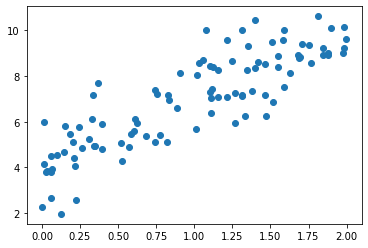

In [3]:
plt.scatter(X, y)

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.12304868],
       [2.89933035]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.12304868],
       [9.92170937]])

(0.0, 2.0, 0.0, 15.0)

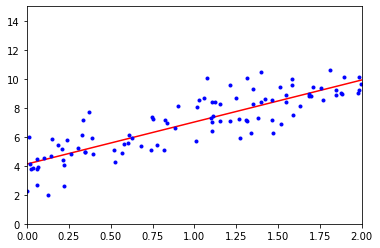

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [9]:
lin_reg.intercept_, lin_reg.coef_

(array([4.12304868]), array([[2.89933035]]))

In [10]:
lin_reg.predict(X_new)

array([[4.12304868],
       [9.92170937]])

## Gradient Descent

In [11]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [12]:
y.shape, y.ravel().shape

((100, 1), (100,))

In [13]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.15020876]), array([2.9411388]))

## Polynomial Regression

In [14]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + 2 + np.random.randn(m, 1)

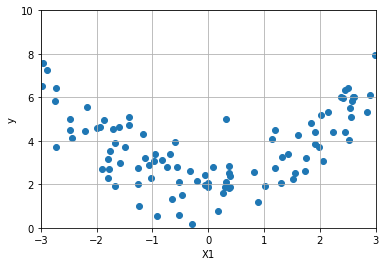

In [15]:
plt.scatter(X, y)
plt.xlabel("X1")
plt.ylabel("y")
plt.axis([-3, 3, 0, 10])
plt.grid()

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([2.59268196]), array([2.59268196, 6.72199975]))

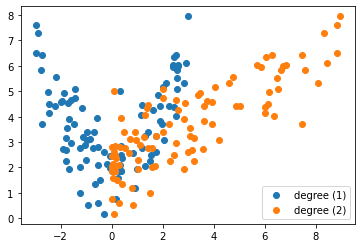

In [17]:
plt.scatter(X_poly[:, 0], y, label="degree (1)")
plt.scatter(X_poly[:, 1], y, label="degree (2)")
plt.legend()

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.11355879]), array([[0.03272497, 0.51711962]]))

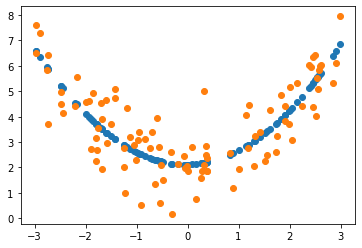

In [19]:
y_pred = lin_reg.predict(X_poly)
plt.scatter(X, y_pred)
plt.scatter(X, y)

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.ylabel("RMSE")
    plt.legend()

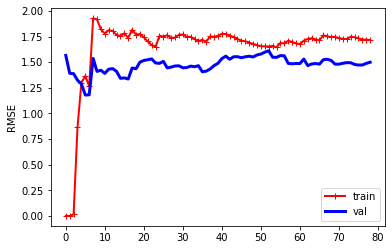

In [21]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

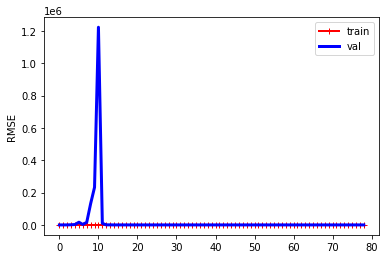

In [23]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline(
    [
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ]
)
plot_learning_curves(polynomial_regression, X, y)

## Regularized Linear Model

- polynomial model can be regularized by reducing the number of polynomial degree
- linear model can be regularized by constraining the weights of the model
  - ridge regression ($a$ = 0, becomes linear regression)
  - lasso regression
  - elastic net

### Ridge Regression

In [24]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[3.80476278]])

In [26]:
from sklearn.linear_model import SGDRegressor

# Using penalty l2 is essentially Ridge regression
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.77347456])

### Lasso Regression

Uses the $l_i$ norm of the weight vector instead of half the square of $l_2$ norm (Ridge regression).

In [31]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y.ravel())
lasso_reg.predict([[1.5]])

array([3.75448208])

In [32]:
# Using penalty l1 is essentially Lasso regression
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.78451233])

## Elastic Net

- mixes both Ridge and Lasso's regularization term
- the mix ratio is $r$, $r=0$ equals Ridge Regression, $r=1$ equals Lasso Regression
- prefer Lasso or Elastic Net because they tend to reduce the useless features weights down to zero
- prefer Elastic Net over Lasso, because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated

In [33]:
from sklearn.linear_model import ElasticNet

# The l1_ratio corresponds to the mix ratio "r"
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([3.77744991])